<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Daily_Challenge_W5D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d juhi1994/superstore

Saving kaggle.json to kaggle.json
  0% 0.00/0.98M [00:00<?, ?B/s]
100% 0.98M/0.98M [00:00<00:00, 86.7MB/s]


In [2]:
!unzip superstore.zip

Archive:  superstore.zip
  inflating: US Superstore data.xls  


In [3]:
import pandas as pd

In [4]:
import plotly.graph_objects as go

In [5]:
import plotly.express as px

In [6]:
from plotnine import ggplot, aes, geom_bar, coord_flip, labs, theme

In [7]:
from plotnine.themes import element_text

In [8]:
df = pd.read_excel('US Superstore data.xls')

# Display the first few rows of the DataFrame
print("Initial data:")
print(df.head())

Initial data:
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   So

In [9]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Create an interactive line chart to show sales trends over the years.


In [11]:
# Extract year from Order Date
df['Year'] = df['Order Date'].dt.year

# Group by Year and sum the Sales
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

# Create an interactive line chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=sales_by_year['Year'], y=sales_by_year['Sales'], mode='lines+markers'))

# Update layout
fig.update_layout(title='Sales Trends Over the Years', xaxis_title='Year', yaxis_title='Sales')

# Display the chart
fig.show()

Build an interactive map to visualize sales distribution by country.

In [12]:
# Create an interactive map
fig = px.scatter_geo(df, locations="Country", locationmode="country names", color="Sales",
                     hover_name="Country", size="Sales", projection="natural earth")

# Update layout
fig.update_layout(title='Sales Distribution by Country')

# Display the map
fig.show()

In [13]:
# Get unique values of the 'Country' column
unique_countries = df['Country'].unique()

# Print the unique values
print("Unique values of 'Country':")
print(unique_countries)

Unique values of 'Country':
['United States']


In [14]:
# Get unique values of the 'Country' column
unique_countries = df['State'].unique()

# Print the unique values
print("Unique values of 'State':")
print(unique_countries)

Unique values of 'State':
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [15]:
# Define a dictionary mapping state names to abbreviations
state_abbr = {
    'Kentucky': 'KY', 'California': 'CA', 'Florida': 'FL', 'North Carolina': 'NC', 'Washington': 'WA',
    'Texas': 'TX', 'Wisconsin': 'WI', 'Utah': 'UT', 'Nebraska': 'NE', 'Pennsylvania': 'PA',
    'Illinois': 'IL', 'Minnesota': 'MN', 'Michigan': 'MI', 'Delaware': 'DE', 'Indiana': 'IN',
    'New York': 'NY', 'Arizona': 'AZ', 'Virginia': 'VA', 'Tennessee': 'TN', 'Alabama': 'AL',
    'South Carolina': 'SC', 'Oregon': 'OR', 'Colorado': 'CO', 'Iowa': 'IA', 'Ohio': 'OH',
    'Missouri': 'MO', 'Oklahoma': 'OK', 'New Mexico': 'NM', 'Louisiana': 'LA', 'Connecticut': 'CT',
    'New Jersey': 'NJ', 'Massachusetts': 'MA', 'Georgia': 'GA', 'Nevada': 'NV', 'Rhode Island': 'RI',
    'Mississippi': 'MS', 'Arkansas': 'AR', 'Montana': 'MT', 'New Hampshire': 'NH', 'Maryland': 'MD',
    'District of Columbia': 'DC', 'Kansas': 'KS', 'Vermont': 'VT', 'Maine': 'ME', 'South Dakota': 'SD',
    'Idaho': 'ID', 'North Dakota': 'ND', 'Wyoming': 'WY', 'West Virginia': 'WV'
}

# Map the state names to their abbreviations in the DataFrame
df['State Abbreviation'] = df['State'].map(state_abbr)

# Create an interactive map
fig = px.scatter_geo(df, locations="State Abbreviation", locationmode="USA-states", color="Sales",
                     hover_name="State", size="Sales", projection="albers usa")

# Update layout
fig.update_layout(title='Sales Distribution by State in the United States')

# Display the map
fig.show()

Data Visualization With Plotnine

Use Plotnine to generate a bar chart showing top 10 products by sales

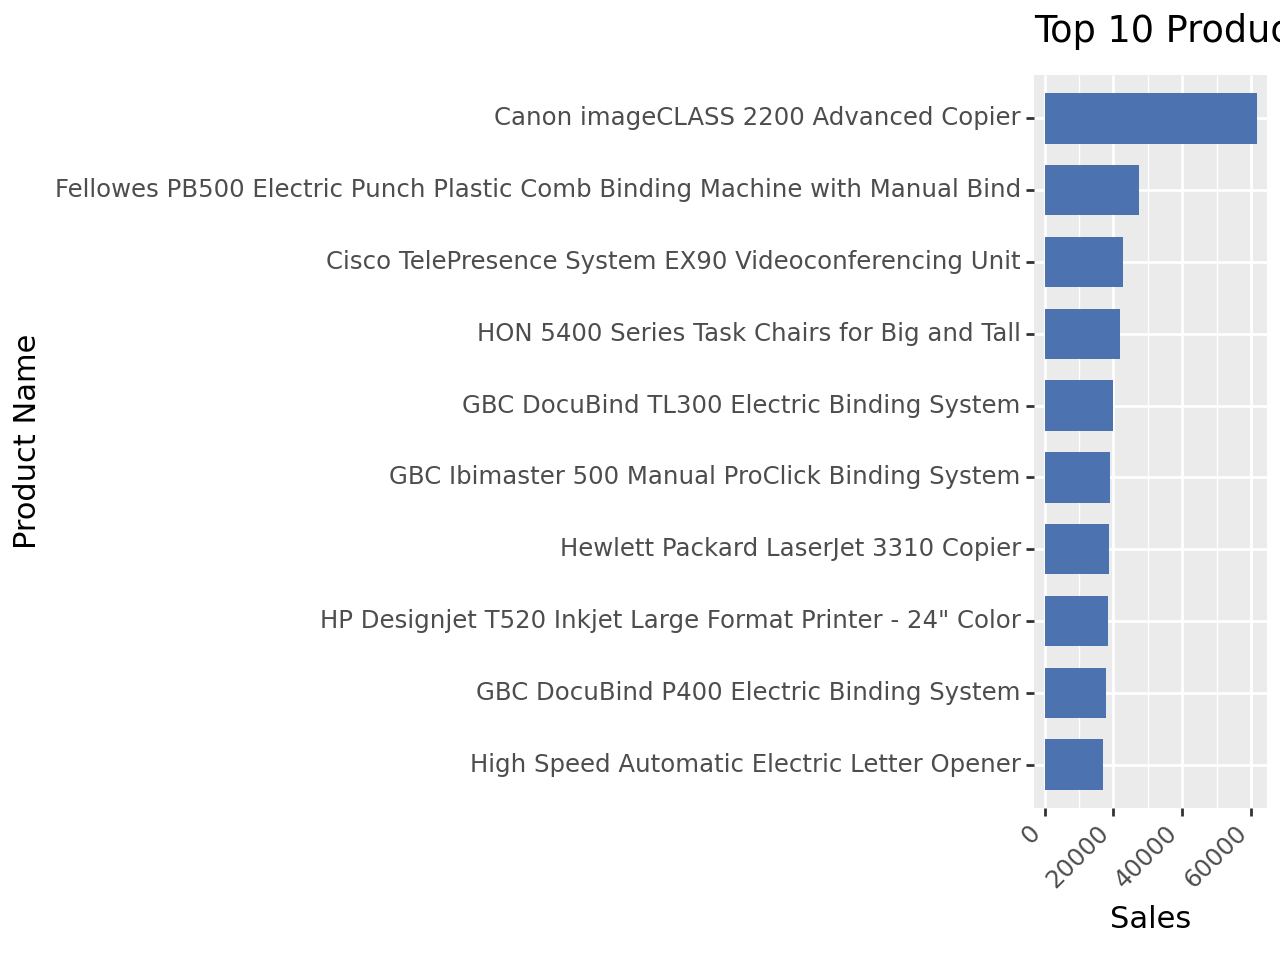

<Figure Size: (640 x 480)>

In [21]:
# Grouping by product name and summing up the sales
top_products = df.groupby('Product Name')['Sales'].sum().reset_index()

# Sorting by sales in ascending order and selecting the top 10 products
top_products = top_products.sort_values(by='Sales', ascending=True).tail(10)

# Convert 'Product Name' to categorical with desired order
top_products['Product Name'] = pd.Categorical(top_products['Product Name'], categories=top_products['Product Name'], ordered=True)

# Plotting the bar chart
(ggplot(top_products, aes(x='Product Name', y='Sales'))
 + geom_bar(stat='identity', width=0.7, fill='#4C72B0')
 + coord_flip()
 + labs(title='Top 10 Products by Sales')
 + theme(axis_text_x=element_text(angle=45, hjust=1))
)

Create a scatter plot to analyze the relationship between profit and discount.

In [25]:
from plotnine import geom_point, theme_minimal

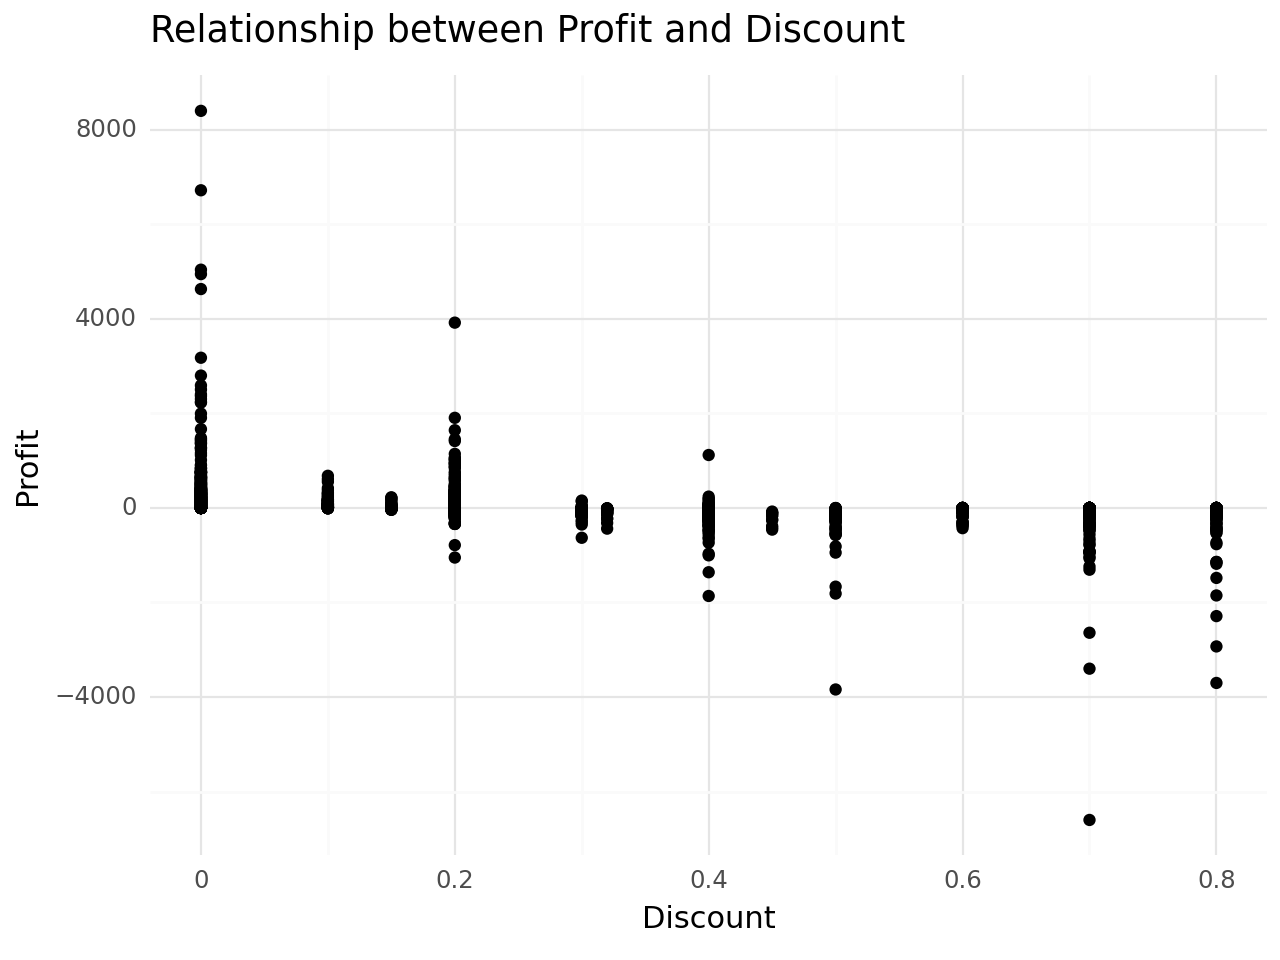

<Figure Size: (640 x 480)>

In [26]:
# Prepare the data
profit_discount = df[['Profit', 'Discount']]

# Plot the scatter plot
(ggplot(profit_discount, aes(x='Discount', y='Profit'))
 + geom_point()
 + labs(title='Relationship between Profit and Discount', x='Discount', y='Profit')
 + theme_minimal()
)

4. Comparative Analysis

Compare the insights gained from Plotly and Plotnine visualizations.

Comparative Analysis:

Ease of Use:
Plotly: Plotly offers a user-friendly interface for creating interactive visualizations. Its syntax is straightforward and intuitive, especially for creating basic plots like line charts, bar charts, and scatter plots. The ability to create interactive plots with just a few lines of code makes it convenient for both beginners and experienced users.
Plotnine: Plotnine, being based on the grammar of graphics, follows a similar syntax to ggplot2 in R. While it provides powerful capabilities for customization and complex visualizations, its syntax may seem a bit more verbose compared to Plotly, especially for beginners. However, once users become familiar with the grammar of graphics principles, Plotnine offers great flexibility and control over visualizations.
Effectiveness:
Plotly: Plotly's interactive visualizations are highly effective for exploring data and communicating insights. The ability to zoom, pan, hover over data points for more information, and add interactive features like dropdowns or sliders enhances the effectiveness of visualizations. Plotly is particularly useful for web-based applications or when sharing visualizations online.
Plotnine: Plotnine's effectiveness lies in its ability to create publication-quality static visualizations with precise control over aesthetics and layout. It offers a wide range of statistical plots and customization options, making it suitable for creating complex visualizations for research papers, presentations, or reports. While it lacks the interactivity of Plotly, it excels in producing static visualizations that are visually appealing and informative.


Observations:

Plotly is preferred when interactivity and web-based applications are essential, or when exploring large datasets that require interactive features for better understanding.
Plotnine is preferred for static visualizations aimed at publication or presentation, where customization and aesthetic control are paramount. It is also well-suited for users familiar with ggplot2 syntax or those who prefer a grammar of graphics approach.
Overall, both Plotly and Plotnine are powerful visualization tools with their strengths and use cases. The choice between them depends on the specific requirements of the analysis and the preferences of the user.





